In [1]:
import pandas as pd

# Replace with your actual file names
true_file = "True.csv"
fake_file = "Fake.csv"

# Load both datasets
true_df = pd.read_csv(true_file)
fake_df = pd.read_csv(fake_file)

print("True shape:", true_df.shape)
print("Fake shape:", fake_df.shape)

print("\nTrue news sample:")
print(true_df.head())

print("\nFake news sample:")
print(fake_df.head())


True shape: (21417, 4)
Fake shape: (23481, 4)

True news sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake news sample:
              

In [2]:
true_df['label'] = 0   # Real news
fake_df['label'] = 1   # Fake news


In [3]:
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

print("Combined shape:", df.shape)
print(df['label'].value_counts())  # check class distribution
df.head()


Combined shape: (44898, 5)
label
1    23481
0    21417
Name: count, dtype: int64


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0




## 📝 Problem Definition (Fake News Detection using NLP + ML)

**Background**
In today’s digital era, misinformation spreads quickly through online platforms like social media and news websites. Fake news can mislead people, create panic, and even influence public opinion or elections. Detecting fake news automatically is a big challenge in Natural Language Processing (NLP).

**Objective**
The main goal is to build a **machine learning model** that can **classify a news article as either Real (True) or Fake** based on its textual content.

**Dataset**
We are using two files:

* **True.csv** → Contains genuine news articles
* **Fake.csv** → Contains fake or misleading news articles
  Both will be combined into one dataset with a `label` column (0 = True, 1 = Fake).

**Problem Type**

* This is a **Binary Classification Problem** (two classes: Fake vs Real).
* Input: News text (title + content)
* Output: Label (0 or 1)

**Why it matters?**

* Helps fight misinformation
* Real-world relevance (social media companies, news agencies, fact-checking organizations)
* Excellent project for showcasing **NLP + ML pipeline skills** on your CV




In [4]:
df.shape

(44898, 5)

In [5]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')>

In [6]:
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [7]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [8]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [9]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.head()


Dataset Shape: (44898, 5)

Columns: ['title', 'text', 'subject', 'date', 'label']

Data Types:
 title      object
text       object
subject    object
date       object
label       int64
dtype: object

Missing Values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


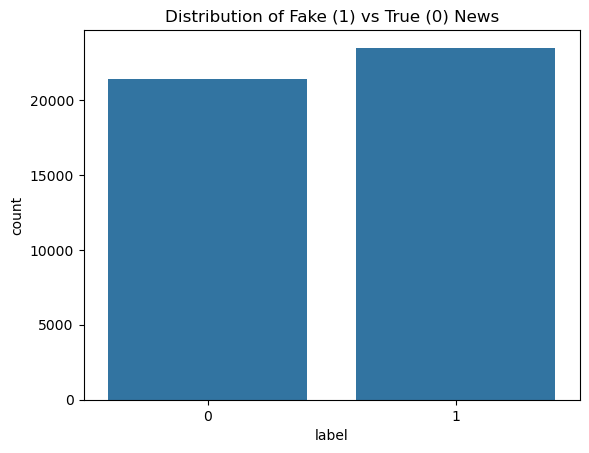

label
1    0.522985
0    0.477015
Name: proportion, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Distribution of Fake (1) vs True (0) News")
plt.show()

print(df['label'].value_counts(normalize=True))


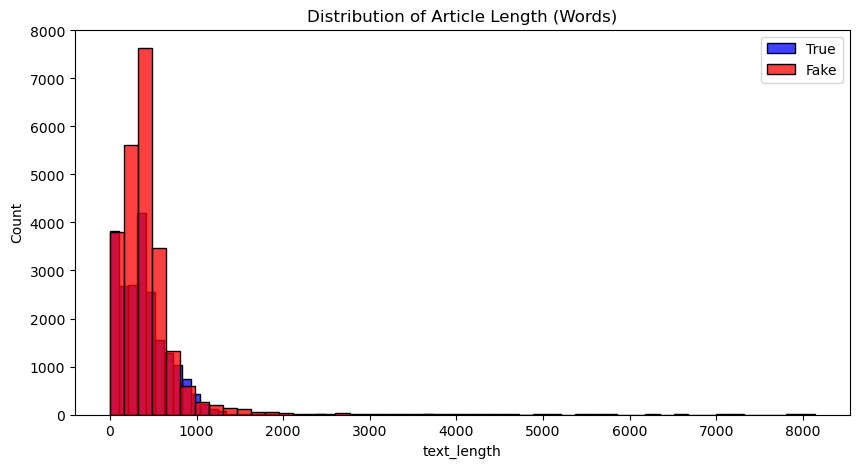

In [11]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(df[df['label']==0]['text_length'], bins=50, color='blue', label='True')
sns.histplot(df[df['label']==1]['text_length'], bins=50, color='red', label='Fake')
plt.legend()
plt.title("Distribution of Article Length (Words)")
plt.show()


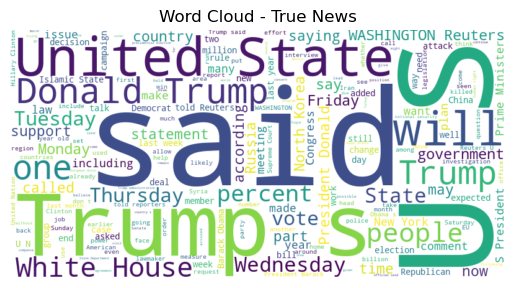

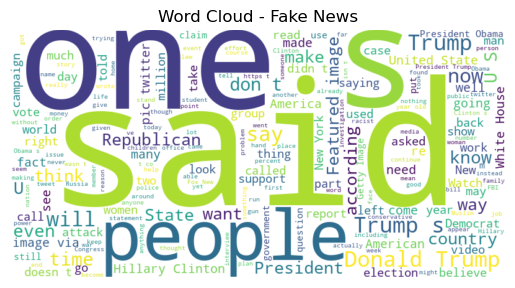

In [12]:
from wordcloud import WordCloud

# WordCloud for True News
true_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['label']==0]['text'].astype(str)))
plt.imshow(true_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - True News")
plt.show()

# WordCloud for Fake News
fake_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['label']==1]['text'].astype(str)))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Fake News")
plt.show()


In [13]:
from collections import Counter

# Most common words in Fake
fake_words = " ".join(df[df['label']==1]['text'].astype(str)).split()
fake_common = Counter(fake_words).most_common(20)

# Most common words in True
true_words = " ".join(df[df['label']==0]['text'].astype(str)).split()
true_common = Counter(true_words).most_common(20)

print("Top 20 Fake News Words:", fake_common)
print("Top 20 True News Words:", true_common)


Top 20 Fake News Words: [('the', 483203), ('to', 286028), ('of', 233193), ('and', 213059), ('a', 202870), ('in', 152840), ('that', 138416), ('s', 127621), ('is', 105555), ('for', 88389), ('on', 76951), ('was', 66430), ('Trump', 64844), ('he', 62175), ('with', 60672), ('his', 55840), ('it', 53935), ('as', 51541), ('be', 47483), ('by', 45791)]
Top 20 True News Words: [('the', 422622), ('to', 243787), ('of', 204339), ('a', 187214), ('and', 179411), ('in', 169538), ('on', 104807), ('that', 82512), ('for', 77867), ('said', 72025), ('The', 55109), ('is', 54454), ('with', 53018), ('was', 47741), ('by', 46908), ('has', 46016), ('as', 45182), ('s', 44638), ('he', 43493), ('from', 38954)]


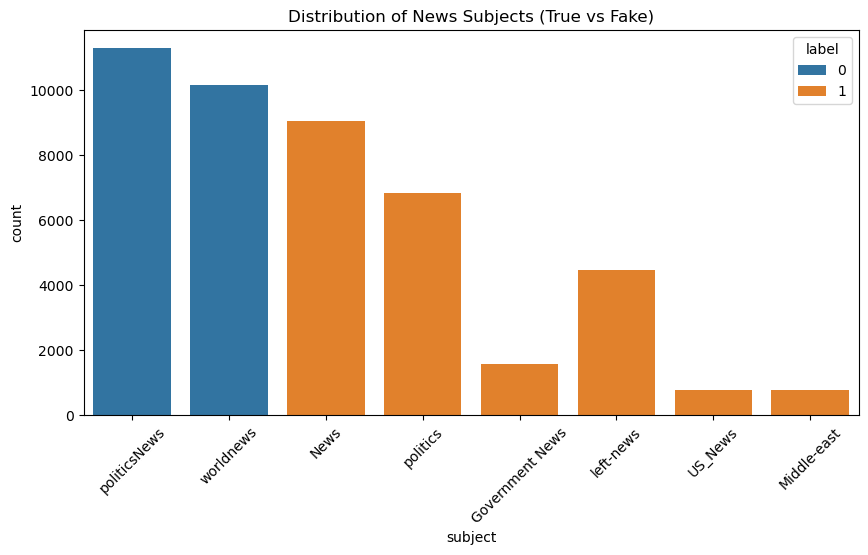

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=df, hue='label')
plt.title("Distribution of News Subjects (True vs Fake)")
plt.xticks(rotation=45)
plt.show()


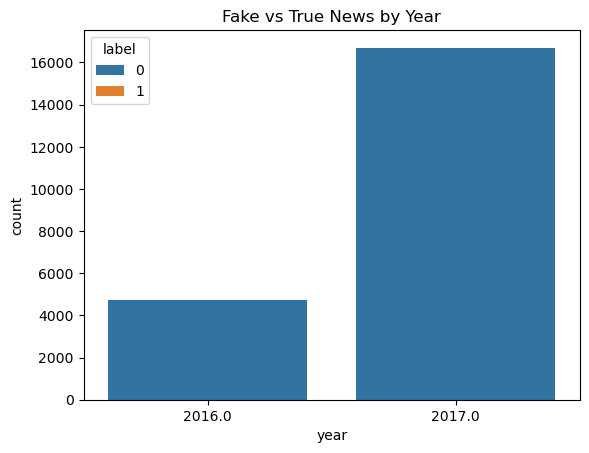

In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

sns.countplot(x='year', data=df, hue='label')
plt.title("Fake vs True News by Year")
plt.show()


In [19]:
df['content'] = df['title'].astype(str) + " " + df['text'].astype(str)


In [20]:
df['content'] = df['content'].str.lower()


In [21]:
import re
import string

def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>', '', text)                  # remove HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\d+', '', text)                    # remove numbers
    return text

df['content'] = df['content'].apply(clean_text)


In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['content'] = df['content'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['content'] = df['content'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
print(df['content'].head(5))


0    u budget fight loom republican flip fiscal scr...
1    u military accept transgender recruit monday p...
2    senior u republican senator let mr mueller job...
3    fbi russia probe helped australian diplomat ti...
4    trump want postal service charge much amazon s...
Name: content, dtype: object




# **Step 1: Problem Definition**

**What we did:**

* Defined the problem: Detect whether a news article is **Fake (1)** or **True (0)** using **text data**.
* Dataset: Two CSV files (`True.csv` and `Fake.csv`).
* Combined them into a single dataset and added a **`label` column**:

  * `0` → True news
  * `1` → Fake news

**Why it matters:**

* Helps fight misinformation.
* Shows skill in **NLP + ML pipeline**.
* Binary classification (two classes) is a standard, CV-friendly ML problem.

---

# **Step 2: Exploratory Data Analysis (EDA)**

EDA is about **understanding the data** before training the model.

### 1. **Basic info**

* Checked dataset shape (number of rows & columns).
* Checked column names and data types.
* Checked for missing values (null values).

**Why:** Helps us understand **what we have** and see if we need to handle missing data.

---

### 2. **Class distribution**

* Counted number of **True** and **Fake** news.
* Visualized with a **bar plot**.

**Why:**

* Ensures dataset is **balanced** or identifies if we need balancing.
* Imbalanced data may cause ML models to predict mostly the bigger class.

---

### 3. **Article length analysis**

* Calculated number of words in each article.
* Compared **True vs Fake** using a histogram.

**Why:**

* Sometimes **fake news is shorter** or uses simpler language.
* Helps us understand patterns in text length.

---

### 4. **Word Clouds**

* Created **word clouds** separately for True and Fake news.

**Why:**

* Word clouds show the **most frequent words** visually.
* Fake news often uses **emotional or sensational words**.
* True news tends to have more formal words.

---

### 5. **Most common words**

* Counted **top 20 words** in Fake and True news.

**Why:**

* Confirms the differences between fake and true articles.
* Can help in **feature engineering** later (some words are strong signals for fake news).

---

### 6. **Subject/Category Analysis (if exists)**

* Checked which subjects/topics have more Fake or True news.

**Why:**

* Fake news might be concentrated in certain topics like politics or entertainment.
* Useful insight for **data understanding and feature selection**.

---

### 7. **Date/Time Analysis (if exists)**

* Converted `date` column to datetime and analyzed trends over years.
* Counted Fake vs True news per year.

**Why:**

* Identifies spikes of fake news during events like elections or crises.
* Adds temporal context to the data.

---

### **Insights from EDA:**

1. Dataset is binary (Fake vs True).
2. Article lengths may differ between classes.
3. Frequent words differ (Fake = emotional/sensational, True = formal).
4. Certain topics may have more fake news.
5. Time trends can be analyzed if `date` column exists.

---

# **Step 3: Text Preprocessing**

Text preprocessing is **cleaning the text** so ML models can understand it.

### 1. **Merge `title` + `text`**

* Combined title and content into one column `content`.
* Reason: Title contains **important keywords**, combining helps ML capture more info.

### 2. **Lowercasing**

* All text converted to lowercase.
* Reason: Makes "News" and "news" the same; avoids duplicate features.

### 3. **Remove URLs, HTML tags, Punctuation, Numbers**

* Removed links, HTML tags (`<a>`, `<p>`), punctuation (`!?,.`), and numbers.
* Reason: These are **noise** and do not help the model learn.

### 4. **Remove Stopwords**

* Stopwords: Words like “is, the, and” that appear everywhere.
* Reason: Stopwords don’t add meaning, removing them reduces noise.

### 5. **Lemmatization**

* Converts words to root form (running → run, better → good).
* Reason: Reduces vocabulary size, groups similar words, improves ML learning.

---

### ✅ Result after preprocessing:

* `content` column contains **clean, lowercase, lemmatized text**.
* Ready for **Step 4: Feature Extraction (TF-IDF vectorization)**.




In [25]:
from sklearn.model_selection import train_test_split

# Features and target
X = df['content']
y = df['label']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (35918,)
Testing set: (8980,)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,  # top 5000 words by importance
    stop_words='english',  # remove common English words
    ngram_range=(1,2)  # use unigrams + bigrams
)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform testing data
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shape (train):", X_train_tfidf.shape)
print("TF-IDF matrix shape (test):", X_test_tfidf.shape)


TF-IDF matrix shape (train): (35918, 5000)
TF-IDF matrix shape (test): (8980, 5000)


In [27]:
# Check first 5 features (words)
print(tfidf.get_feature_names_out()[:20])


['abandon' 'abandoned' 'abbas' 'abc' 'abc news' 'abdullah' 'abe' 'abedin'
 'ability' 'able' 'abortion' 'abroad' 'absence' 'absolute' 'absolutely'
 'abu' 'abuse' 'academic' 'academy' 'accept']


In [28]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Train the model on TF-IDF features
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [29]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.9899777282850779

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4330
           1       0.99      0.99      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
 [[4298   32]
 [  58 4592]]


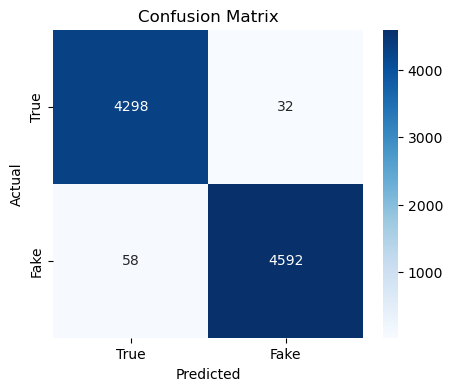

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True','Fake'], yticklabels=['True','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




At this point, your text data has been **completely preprocessed** and converted into a format suitable for ML models. Let’s break it down:

---

## **1. Train-Test Split**

* We split the dataset into **training set (80%)** and **testing set (20%)**.
* **Training set:** The model **learns patterns** here (e.g., which words indicate Fake or True news).
* **Testing set:** We use it **after training** to see how well the model generalizes to **unseen news articles**.

**Why:**

* Without splitting, we could “cheat” by testing on data the model already saw, which gives **over-optimistic results**.

---

## **2. TF-IDF Vectorization**

* Text cannot be fed into ML models directly, so we convert it into **numbers**.
* TF-IDF gives each word a **weight** based on:

  1. **Term Frequency (TF):** How often a word appears in an article.
  2. **Inverse Document Frequency (IDF):** Words that appear in **many articles** get **lower weight**, rare words get **higher weight**.

**Example:**

* Word “government” appears in many articles → lower weight.

* Word “scandal” appears only in some fake news → higher weight → important feature.

* We also used:

  * `max_features=5000` → Only the top 5000 important words are kept.
  * `ngram_range=(1,2)` → Consider **single words (unigrams)** and **pairs of words (bigrams)**.
  * `stop_words='english'` → Common words like “the, is, and” are ignored.

---

## **3. What TF-IDF does to our data**

* Each article is now represented as a **vector of 5000 numbers** (features).
* Example: `[0.0, 0.1, 0.03, 0.0, ...]`
* Each number represents the **importance of a specific word or bigram** in that article.
* **Sparse matrix:** Most numbers are 0 because each article uses only a small subset of all words.

---

## **4. Why Step 4 is important**

1. ML models **cannot read text directly**, they only understand numbers.
2. TF-IDF captures **meaningful information** (important words, rare words) while ignoring common words.
3. After Step 4, the dataset is **ready for ML training**:

   * `X_train_tfidf` → features for training
   * `X_test_tfidf` → features for testing
   * `y_train` → labels for training
   * `y_test` → labels for testing

---

✅ **Summary:**

At the end of Step 4:

* Text is **cleaned, lemmatized, and lowercased**.
* Each news article is now a **numerical vector**.
* The dataset is **split into training and testing sets**.
* We are fully ready for **Step 5: Model Training & Evaluation**.






At this stage, our dataset is **preprocessed, TF-IDF features are ready**, and we have **train-test split**. Now we train the ML model and see how well it predicts Fake vs True news.

---

## **1. Logistic Regression Model**

**What it is:**

* Logistic Regression is a **classification algorithm**.
* It predicts the probability of a sample belonging to a class (0 = True, 1 = Fake).
* Uses a **sigmoid function** to output a probability between 0 and 1.

**Code to train the model:**

```python
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Train on training data
model.fit(X_train_tfidf, y_train)
```

**Explanation:**

* `max_iter=1000` → Ensures the algorithm converges fully (learns well).
* Model **learns patterns of words** from the TF-IDF features.

  * For example, “scandal” might increase probability of Fake news.
  * Words like “official” or “report” might indicate True news.

---

## **2. Make Predictions**

```python
# Predict on test data
y_pred = model.predict(X_test_tfidf)
```

**Explanation:**

* `y_pred` contains the **predicted label (0 or 1)** for each article in the test set.

---

## **3. Evaluate the Model**

We evaluate using **Accuracy, Precision, Recall, F1-Score, and Confusion Matrix**.

```python
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
```

**Explanation of metrics:**

1. **Accuracy** → % of correctly predicted news articles.
2. **Precision (Fake class)** → Of all predicted Fake news, how many were actually Fake.
3. **Recall (Fake class)** → Of all actual Fake news, how many were correctly detected.
4. **F1-Score** → Harmonic mean of Precision & Recall.
5. **Confusion Matrix** → Shows actual vs predicted:

|                 | Pred True           | Pred Fake           |
| --------------- | ------------------- | ------------------- |
| **Actual True** | True Negative (TN)  | False Positive (FP) |
| **Actual Fake** | False Negative (FN) | True Positive (TP)  |

---

## **4. Visualize Confusion Matrix (Optional but helpful)**

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True','Fake'], yticklabels=['True','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
```

**Why:**

* Helps **quickly see mistakes**.
* For example, many FN → model missing Fake news → need improvement.

---

## **5. Key Points**

* Logistic Regression is a **baseline ML model** for text classification.
* Performance depends on **TF-IDF features**, training data quality, and preprocessing.
* This completes the **core ML pipeline**:

  1. Load & combine data
  2. EDA
  3. Preprocessing
  4. Feature extraction (TF-IDF)
  5. Train & evaluate model

---

✅ **After Step 5:**

* You have a **working Fake News Classifier** using **pure ML**.
* You can see **how accurate it is**, and which articles are misclassified.



In [32]:
import joblib

# Save Logistic Regression model
joblib.dump(model, "fake_news_model.pkl")

# Save TF-IDF Vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and TF-IDF saved successfully!")


Model and TF-IDF saved successfully!


In [33]:
pip install fastapi uvicorn




   ---------------------------------------- 0/3 [uvicorn]
   ------------- -------------------------- 1/3 [starlette]
   -------------------------- ------------- 2/3 [fastapi]
   -------------------------- ------------- 2/3 [fastapi]
   ---------------------------------------- 3/3 [fastapi]



In [35]:
pip install faker


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- -------------------------